# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

tran_t = pd.read_csv('/Users/rajatrhande/Desktop/DSF/Lab/ieee-fraud-detection/train_transaction.csv')
iden_t = pd.read_csv('/Users/rajatrhande/Desktop/DSF/Lab/ieee-fraud-detection/train_identity.csv')

merged_t = pd.merge(iden_t, tran_t, how="inner")
tran_tf = tran_t[tran_t.isFraud == 1]
tran_tnf = tran_t[tran_t.isFraud == 0]

Please note that the graphs are colored red and green to depict fraudulent and non-fraudulent transactions. It makes the entire report monotonous, but certainly increases the readability of the graphs.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

### Analysis on Transaction Amount

The fraudulent transactions constitute to only 3.5% of the entire dataset. Out of these transactions, It is observed that mean of fraudulent transactions : 149.24 with a standard deviation of 232.2.

It can be concluded that the higher transaction amounts are outliers in this distribution.

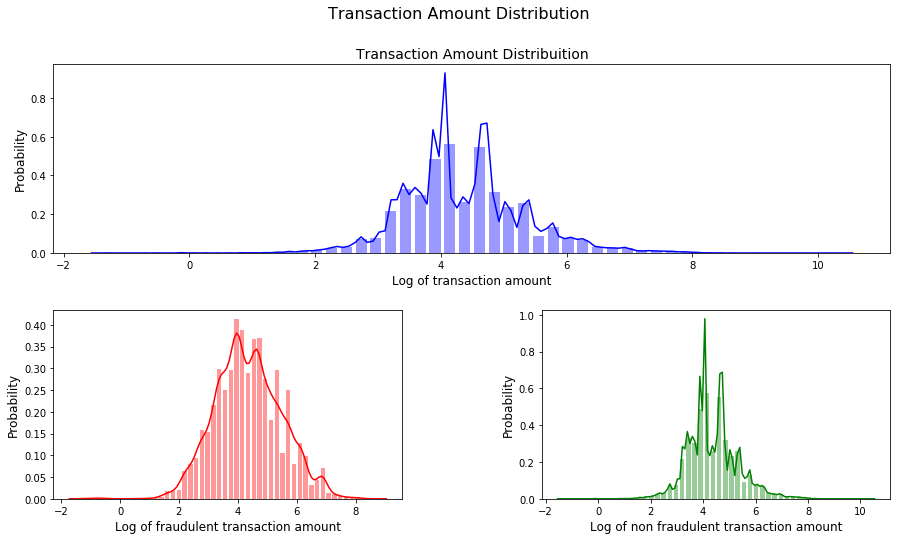

In [2]:
plt.figure(figsize=(15,8))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0:])
tranHist = sb.distplot(np.log(tran_t['TransactionAmt']), color="b", hist_kws={"rwidth":0.75})
tranHist.set_xlabel("Log of transaction amount", fontsize=12)
tranHist.set_ylabel("Probability", fontsize=12)
tranHist.set_title("Transaction Amount Distribuition", fontsize=14)

plt.suptitle('Transaction Amount Distribution', fontsize=16)
plt.subplot(grid[1, 0])
tranHistF = sb.distplot(np.log(tran_tf['TransactionAmt']), color="r", hist_kws={"rwidth":0.75})
tranHistF.set_xlabel("Log of fraudulent transaction amount", fontsize=12)
tranHistF.set_ylabel("Probability", fontsize=12)
plt.subplot(grid[1, 1])
tranHistNf = sb.distplot(np.log(tran_tnf['TransactionAmt']), color="g", hist_kws={"rwidth":0.75})
tranHistNf.set_xlabel("Log of non fraudulent transaction amount", fontsize=12)
tranHistNf.set_ylabel("Probability", fontsize=12)

plt.show()

### Analysis on ProductCD

ProductCD: Most of the transactions fall under ProductCD 'W'. ProductCD 'C' has the highest fraudulent transactions through percentage (About 12%). 

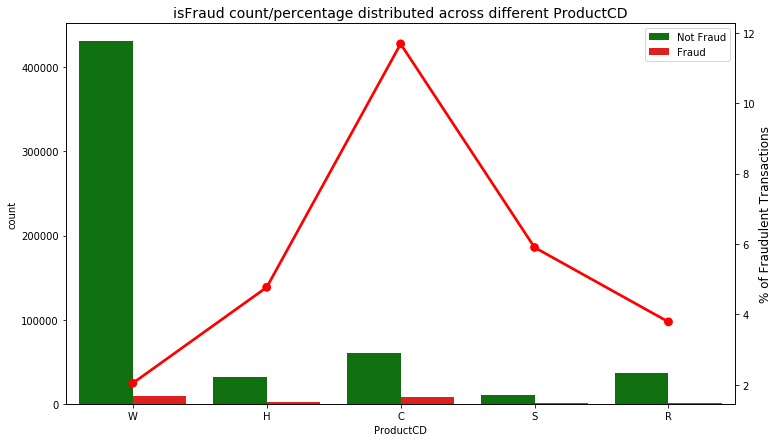

In [73]:
productOrder = ["W","H","C","S","R"]
i ="ProductCD"
plt.figure(figsize=(12,7))
cp = pd.crosstab(tran_t[i], tran_t['isFraud'], normalize='index') * 100
cp = cp.reset_index()
cp.rename(columns={0:'Not Fraud', 1:'Fraud'}, inplace=True)
countPlot_breakdown = sb.countplot(x=i, hue='isFraud', data=tran_t, palette=["green", "red"])
plt.legend(title='', loc='best', labels=['Not Fraud', 'Fraud'])
plt.title("isFraud count/percentage distributed across different " + i, fontsize=14);
countPlot_breakdown_1 = countPlot_breakdown.twinx()
countPlot_breakdown_1 = sb.pointplot(x=i, y='Fraud', data=cp, color='red', order=productOrder, legend=False)
countPlot_breakdown_1.set_ylabel("% of Fraudulent Transactions", fontsize=12)
plt.show()

### Analysis on card4 (Card Source) and card6 (Card Type)

Conclusion: The graph below is self explanatory. No solid conclusions can be obtained from the pattern.

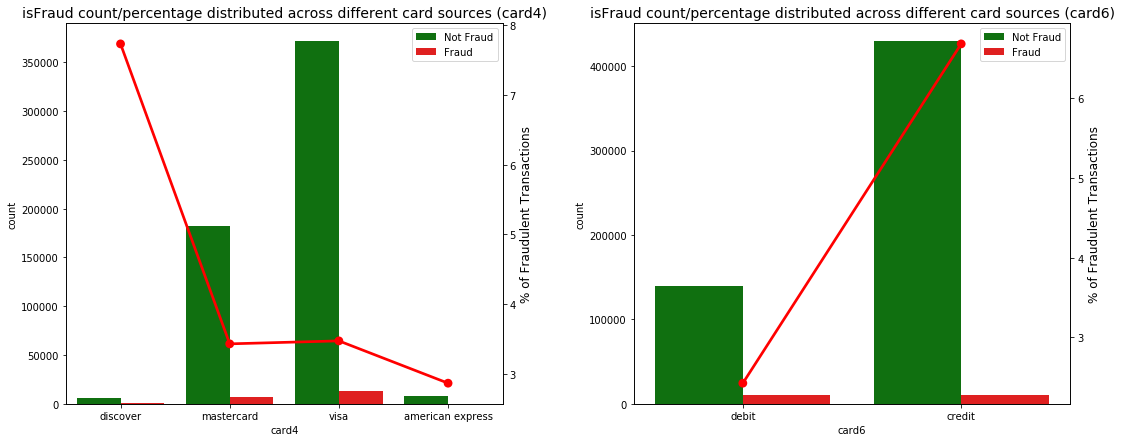

In [5]:
orderMap = {
  "card4": ['discover', 'mastercard',"visa", "american express"],
  "card6": ['debit', 'credit']
}
plt.figure(figsize=(18,7))
grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.1)
x = 0;
for i in ['card4', 'card6']:
    cp = pd.crosstab(tran_t[i], tran_t['isFraud'], normalize='index') * 100
    cp = cp.reset_index() 
    cp.rename(columns={0:'Not Fraud', 1:'Fraud'}, inplace=True)
    plt.subplot(grid[0, x])
    countPlot_breakdown = sb.countplot(x=i, hue='isFraud', data=tran_t, palette=["green", "red"])
    plt.legend(title='', loc='best', labels=['Not Fraud', 'Fraud'])
    plt.title("isFraud count/percentage distributed across different card sources (" + i + ")", fontsize=14);
    countPlot_breakdown_1 = countPlot_breakdown.twinx()
    countPlot_breakdown_1 = sb.pointplot(x=i, y='Fraud', data=cp, color='red', 
                                     order=orderMap[i], legend=False)
    countPlot_breakdown_1.set_ylabel("% of Fraudulent Transactions", fontsize=12)
    x=x+1
plt.show()

### Analysis on P_Email Domain (Purchaser) and R_Email Domain (Receiver)

Google contributes to the majority in both senders' and receivers email domains. The graphs presented are self explanatory.

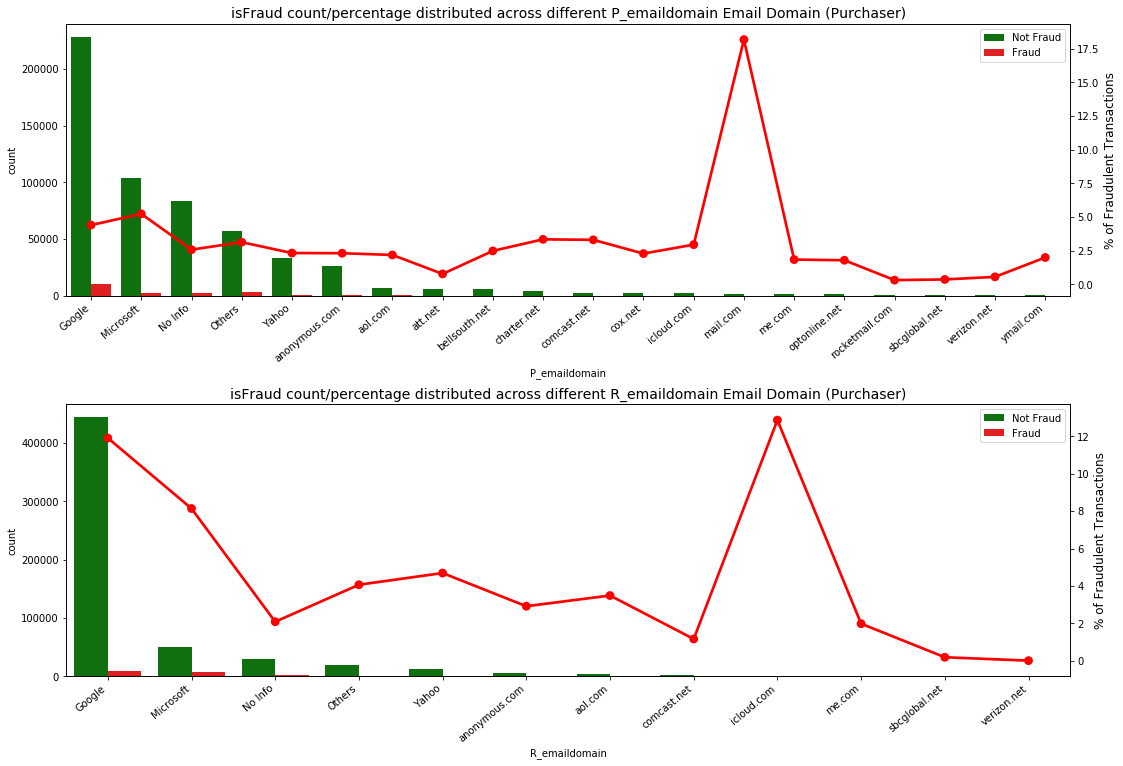

In [12]:
plt.figure(figsize=(18,12))
grid = plt.GridSpec(2, 1, hspace=0.4)
x = 0;

for i in ['P_emaildomain', 'R_emaildomain']:
    plt.subplot(grid[x, 0])
    tran_t.loc[tran_t[i].isin(['yahoo.com', 'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es','yahoo.com.mx']), i] = 'Yahoo'
    tran_t.loc[tran_t[i].isin(['gmail.com', 'gmail']),i] = 'Google'
    tran_t.loc[tran_t[i].isin(['hotmail.com','hotmail.co.uk','hotmail.es', 'hotmail.de', 'hotmail.fr'
                                         'outlook.es','outlook.com','live.fr','live.com.mx', 'live.com','msn.com']),
                                         i] = 'Microsoft'
    tran_t.loc[tran_t[i].isin(tran_t[i].value_counts()[tran_t[i].value_counts() <= 500 ].index), i] = "Others"
    tran_t[i].fillna("No Info", inplace=True)
    cp = pd.crosstab(tran_t[i], tran_t['isFraud'], normalize='index') * 100
    cp = cp.reset_index() 
    cp.rename(columns={0:'Not Fraud', 1:'Fraud'}, inplace=True)
    countPlot_breakdown = sb.countplot(x=i,
                                   hue='isFraud',
                                   data=tran_t,
                                   order = tran_t[i].value_counts().index,
                                   palette=["green", "red"])
    plt.legend(title='', loc='best', labels=['Not Fraud', 'Fraud'])
    plt.title("isFraud count/percentage distributed across different " + i + " Email Domain (Purchaser)", fontsize=14);
    countPlot_breakdown.set_xticklabels(countPlot_breakdown.get_xticklabels(), rotation=40, ha="right")
    countPlot_breakdown_1 = countPlot_breakdown.twinx()
    countPlot_breakdown_1 = sb.pointplot(x=i, y='Fraud', data=cp, color='red', 
                                    order=np.asarray(cp[i]), legend=False)
    countPlot_breakdown_1.set_ylabel("% of Fraudulent Transactions", fontsize=12)
    x=x+1
plt.show()

### Analysis of addr1 and addr2

The addr1 field (region) is spread out over a large set of values where are addr2 field is limited to mostly a single country with the country code 87.

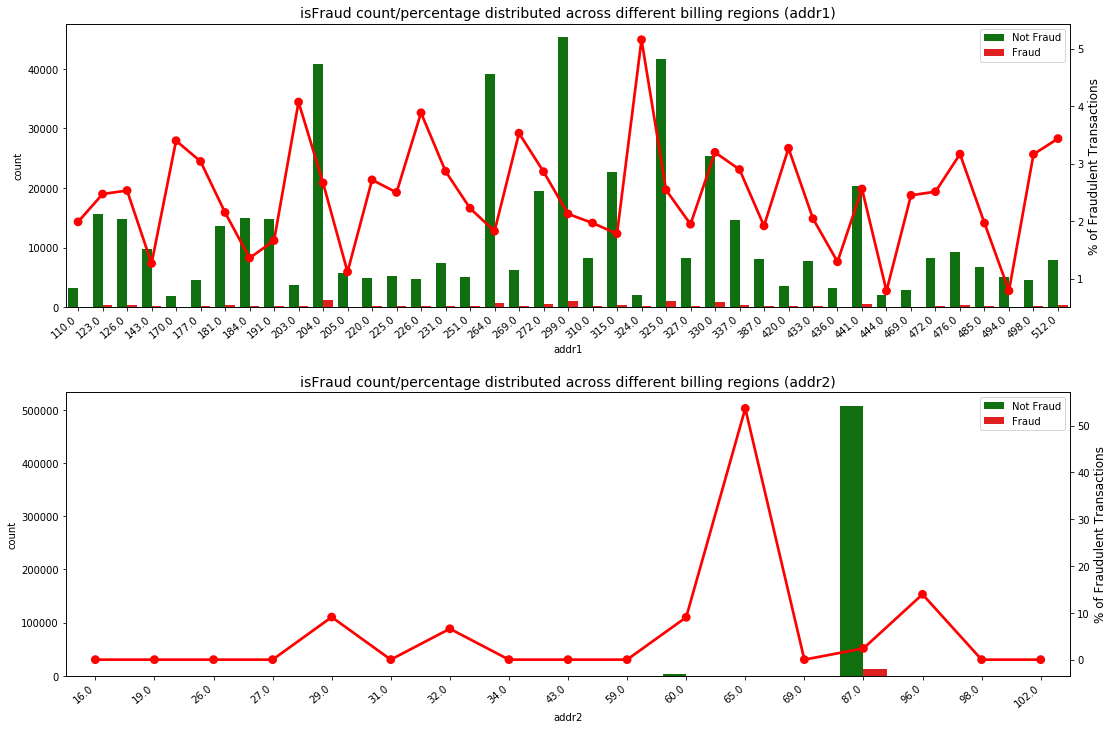

In [15]:
orderMap = {
  "addr1": 2000,
  "addr2": 10
}
plt.figure(figsize=(18,12))
grid = plt.GridSpec(2, 1, hspace=0.3)
x = 0;
for i in ['addr1', 'addr2']:
    plt.subplot(grid[x, 0])
    cp1 = tran_t[tran_t.groupby(i)[i].transform('size') > orderMap[i]]
    cp = pd.crosstab(cp1[i], cp1['isFraud'], normalize='index') * 100
    cp = cp.reset_index() 
    cp.rename(columns={0:'Not Fraud', 1:'Fraud'}, inplace=True)
    countPlot_breakdown = sb.countplot(x=i,
                                   hue='isFraud',
                                   data=cp1,
                                   palette=["green", "red"])
    plt.legend(title='', loc='best', labels=['Not Fraud', 'Fraud'])
    plt.title("isFraud count/percentage distributed across different billing regions (" + i + ")", fontsize=14);
    countPlot_breakdown.set_xticklabels(countPlot_breakdown.get_xticklabels(), rotation=40, ha="right")
    countPlot_breakdown_1 = countPlot_breakdown.twinx()
    countPlot_breakdown_1 = sb.pointplot(x=i, y='Fraud', data=cp, color='red', 
                                    order=np.asarray(cp[i]), legend=False)
    countPlot_breakdown_1.set_ylabel("% of Fraudulent Transactions", fontsize=12)
    x=x+1
plt.show()

### Analysis of dist1 and dist2

The graphs are self explanatory. Nothing interesting can be inferred from it.

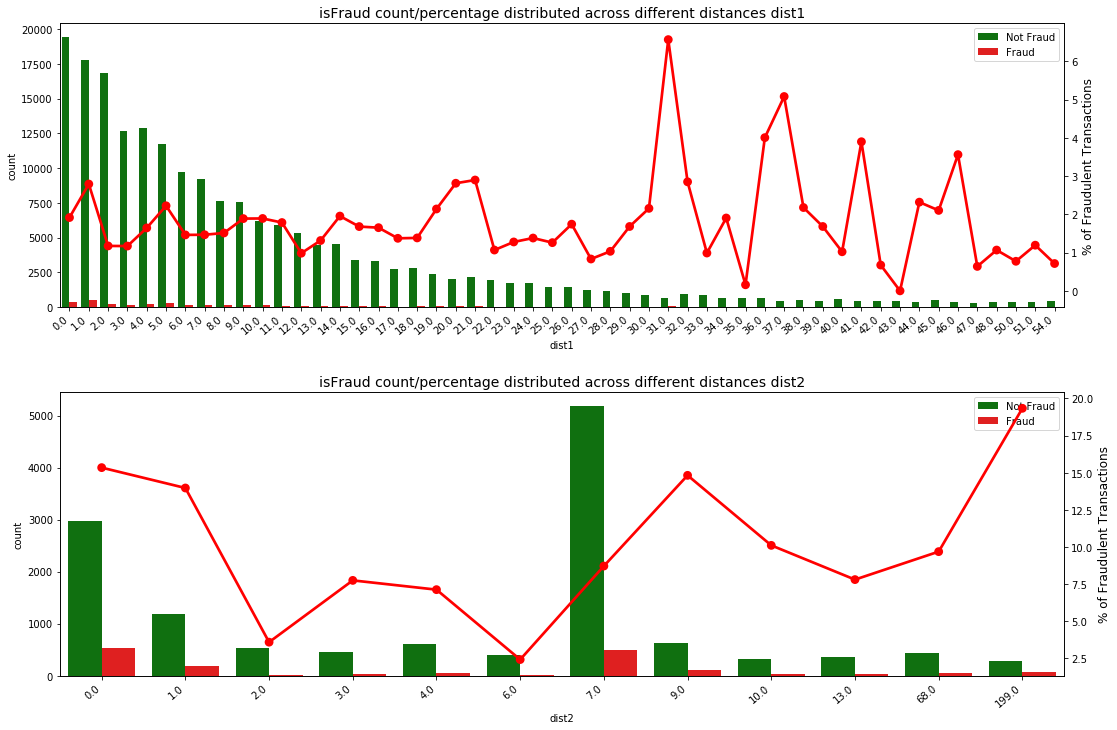

In [18]:
plt.figure(figsize=(18,12))
grid = plt.GridSpec(2, 1, hspace=0.3)
x = 0;
for i in ['dist1', 'dist2']:
    plt.subplot(grid[x, 0])
    cp1 = tran_t[tran_t.groupby(i)[i].transform('size') > 300]
    cp1['dist1'].value_counts()
    
    cp = pd.crosstab(cp1[i], cp1['isFraud'], normalize='index') * 100
    cp = cp.reset_index() 
    cp.rename(columns={0:'Not Fraud', 1:'Fraud'}, inplace=True)
    countPlot_breakdown = sb.countplot(x=i,
                                   hue='isFraud',
                                   data=cp1,
                                   palette=["green", "red"])
    plt.legend(title='', loc='best', labels=['Not Fraud', 'Fraud'])
    plt.title("isFraud count/percentage distributed across different distances " + i, fontsize=14);
    countPlot_breakdown.set_xticklabels(countPlot_breakdown.get_xticklabels(), rotation=40, ha="right")
    countPlot_breakdown_1 = countPlot_breakdown.twinx()
    countPlot_breakdown_1 = sb.pointplot(x=i, y='Fraud', data=cp, color='red', 
                                    order=np.asarray(cp[i]), legend=False)
    countPlot_breakdown_1.set_ylabel("% of Fraudulent Transactions", fontsize=12)
    x=x+1
plt.show()

### Analysis of Device Info and Device Type

DeviceType: Most of the transactions are based out of mobile devices and fraudulent transaction precentage is higher in case of mobile devices.

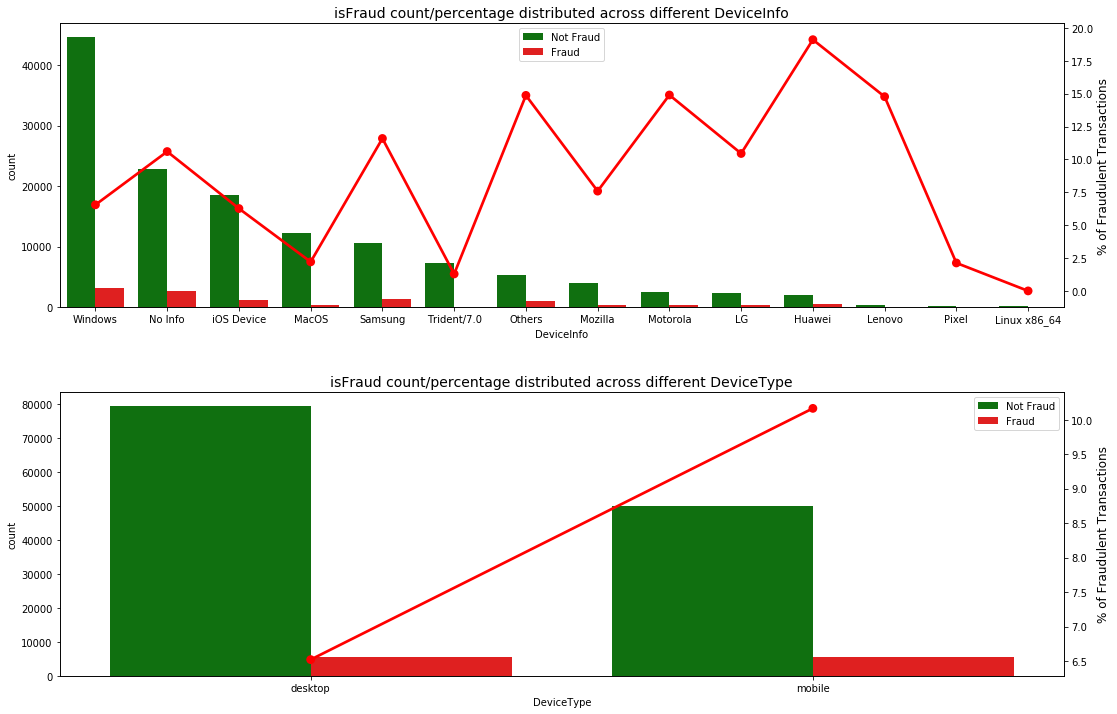

In [161]:
orderMap = {
  "DeviceInfo": ["Windows", "No Info", "iOS Device", "MacOS", "Samsung", "Trident/7.0",
                 "Others", "Mozilla", "Motorola", "LG", "Huawei", "Lenovo", "Pixel", "Linux x86_64"],
  "DeviceType": ["desktop", "mobile"]
}
trail_t = merged_t;
plt.figure(figsize=(18,12))
grid = plt.GridSpec(2, 1, hspace=0.3)
x = 0;

replaceMap = {
    "SM": "Samsung", "SAMSUNG":"Samsung", "Moto" : "Motorola", "HUAWEI" : "Huawei",
    "hi6210sft": "Huawei", "ALE-L23 Build/HuaweiALE-L23":"Huawei", "KFT" : "Kindle Fire Tablet",
    "Pixel" : "Pixel", "Windows" : "Windows", "Lenovo" :"Lenovo", "Pixel" : "Pixel", "rv" : "Mozilla"
}
for i in ['DeviceInfo', 'DeviceType']:
    if i == 'DeviceInfo':
        trail_t.DeviceInfo.fillna("No Info", inplace=True)
        for key in replaceMap:
            trail_t.loc[trail_t['DeviceInfo'].str.contains(key), 'DeviceInfo'] = replaceMap[key]
        trail_t.loc[trail_t.DeviceInfo.isin(trail_t.DeviceInfo\
                                         .value_counts()[trail_t.DeviceInfo.value_counts() <= 100 ]\
                                         .index), 'DeviceInfo'] = "Others"
    cp = pd.crosstab(merged_t[i], merged_t['isFraud'], normalize='index') * 100
    cp = cp.reset_index()
    cp.rename(columns={0:'Not Fraud', 1:'Fraud'}, inplace=True)
    plt.subplot(grid[x, 0])
    countPlot_breakdown = sb.countplot(x=i, hue='isFraud', data=merged_t, order=orderMap[i], palette=["green", "red"])
    plt.legend(title='', loc='best', labels=['Not Fraud', 'Fraud'])
    plt.title("isFraud count/percentage distributed across different " + i, fontsize=14);
    countPlot_breakdown_1 = countPlot_breakdown.twinx()
    countPlot_breakdown_1 = sb.pointplot(x=i, y='Fraud', data=cp, color='red', order=orderMap[i], legend=False)
    countPlot_breakdown_1.set_ylabel("% of Fraudulent Transactions", fontsize=12)
    x=x+1
plt.show()

## Part 2 - Transaction Frequency

The most frequent country code (by a large margin) is 87. Transactions per hour of the day is calculated by dividing the transactionDT by 3600.

The plots plotted below are for transactions from day 1 for the next 54 hours. We notice a pattern in the graph. My educated guess would be that the number of transactions would be higher during the day time (Obviously). We see the dips at hours 33 and 57 which are 24 hours apart.

We can consider the dips to be about 6AM in the morning as internet activity would be the lowest in the morning hours and keep increasing in the day.

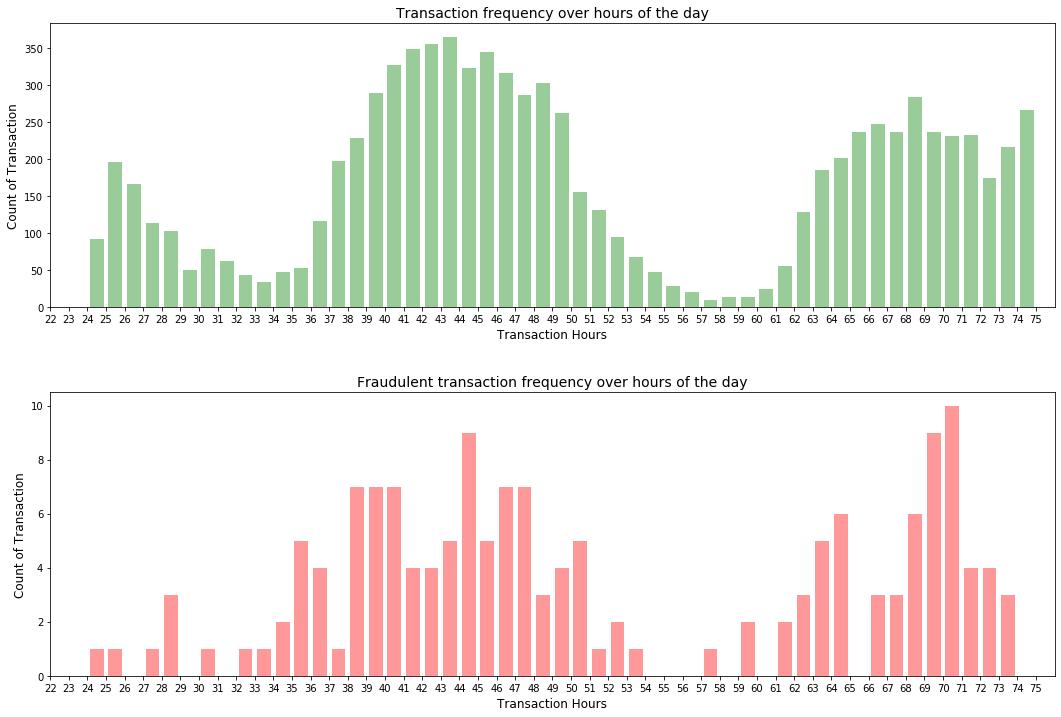

In [48]:
plt.figure(figsize=(18,12))
grid = plt.GridSpec(2, 1, hspace=0.3)

plt.subplot(grid[0, 0])
trial_t = tran_t[(tran_t['addr2'] == 87)]
trial_t = trial_t['TransactionDT'].apply(lambda time: round(time/(3600)))
trial_t = trial_t.reset_index() 
trial_t.rename(columns={0:'TransactionDT'}, inplace=True)
tranHist = sb.distplot(trial_t['TransactionDT'], kde=False, color="green", bins=np.arange(22, 76, 1), hist_kws={"rwidth":0.75})
tranHist.set_xlim(22,76)
tranHist.set_xticks(np.arange(22,76,1))
tranHist.set_xlabel("Transaction Hours", fontsize=12)
tranHist.set_ylabel("Count of Transaction", fontsize=12)
tranHist.set_title("Transaction frequency over hours of the day", fontsize=14)
plt.subplot(grid[1, 0])
trial_t = tran_t[(tran_t['addr2'] == 87) & (tran_t['isFraud'] == 1)]
trial_t = trial_t['TransactionDT'].apply(lambda time: time/(3600))
trial_t = trial_t.reset_index() 
trial_t.rename(columns={0:'TransactionDT'}, inplace=True)
tranHist = sb.distplot(trial_t['TransactionDT'], kde=False, color="red", bins=np.arange(22, 76, 1), hist_kws={"rwidth":0.75})
tranHist.set_xlim(22,76)
tranHist.set_xticks(np.arange(22,76,1))
tranHist.set_xlabel("Transaction Hours", fontsize=12)
tranHist.set_ylabel("Count of Transaction", fontsize=12)
tranHist.set_title("Fraudulent transaction frequency over hours of the day", fontsize=14)
plt.show()

## Part 3 - Product Code

Find the distribution of transaction amounts across different product types.
**Most expensive product:

Two candidates for most expensive products are productCD W and R (Transactions below 6000)

ProductCD | W       | R      |
----------|-----|----|
Count     | 439666  | 37699  |
Mean      | 152.99  | 168.30 |
Std       | 259.71  | 142.03 |
Min       | 1.0     | 25.0   |
Max       | 5543.23 | 1800.0 |

However, there are 383 transactions above 3000 for productCD W. Thus, concluding that **product W** is the **most expensive** product.

**Least expensive product:**

Three candidates for least expensive products are productCD H, C, S

ProductCD | H       | C      | S     |
----------|-----|----|---|
Count     | 31450  | 60511  | 10942 |
Mean      | 68.99  | **42.07** |60.08|
Std       | 54.65  | 37.98 |81.13|
Min       | 15.0    | 0.25   | 5.0|
Max       | 500.0 | 486.4 | 1550.0|

We see that that **product C** could be the **least expensive** product as it has the least mean and standard deviation.



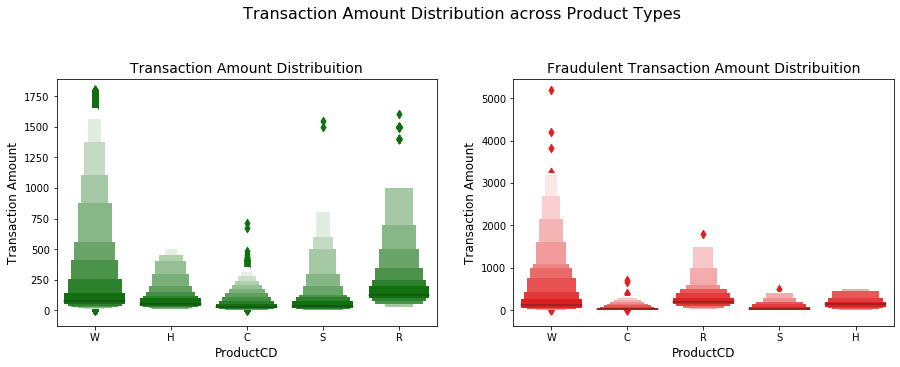

In [97]:
f, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)
plt.suptitle('Transaction Amount Distribution across Product Types', fontsize=16)
plt.subplot(221)
trial_t = tran_t.loc[:, ['ProductCD', 'TransactionAmt', 'isFraud']]
trial_t = trial_t[trial_t['TransactionAmt'] < 10000]
tranHistF = sb.boxenplot(y="TransactionAmt", x="ProductCD",
              color="g",
              scale="linear", data=trial_t)
tranHistF.set_xlabel("ProductCD", fontsize=12)
tranHistF.set_ylabel("Transaction Amount", fontsize=12)
tranHistF.set_title("Transaction Amount Distribuition", fontsize=14)
plt.subplot(222)
trial_t = tran_t.loc[:, ['ProductCD', 'TransactionAmt', 'isFraud']]
trial_t = trial_t[trial_t['TransactionAmt'] < 10000]
trial_t = trial_t[trial_t['isFraud'] == 1]
tranHistNf = sb.boxenplot(y="TransactionAmt", x="ProductCD",
              color="r",
              scale="linear", data=trial_t)
tranHistNf.set_xlabel("ProductCD", fontsize=12)
tranHistNf.set_ylabel("Transaction Amount", fontsize=12)
tranHistNf.set_title("Fraudulent Transaction Amount Distribuition", fontsize=14)

plt.show()

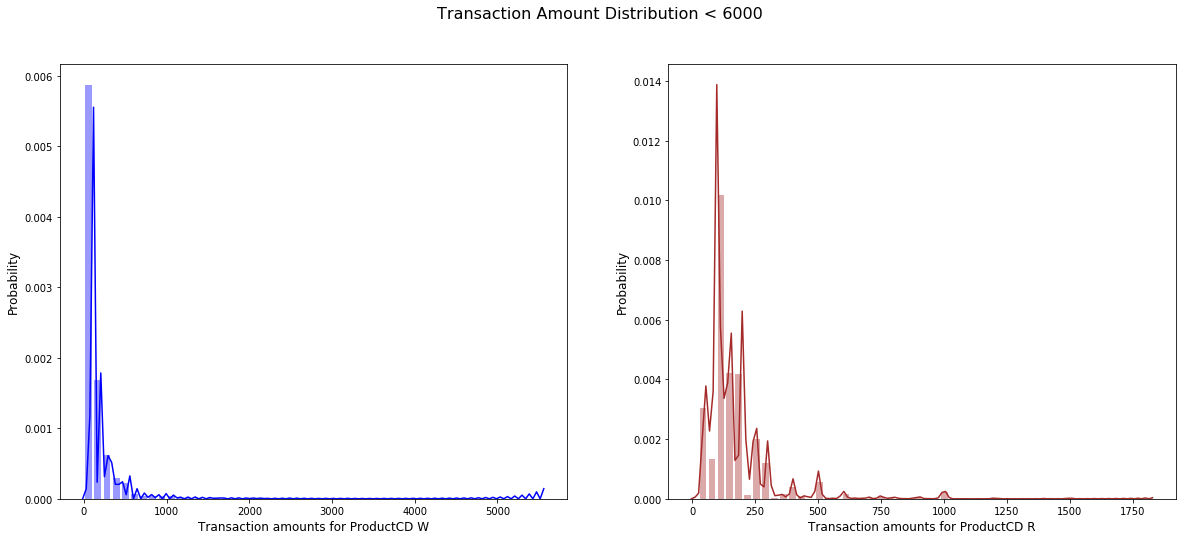

In [116]:
trial_t = tran_t.loc[:, ['ProductCD', 'TransactionAmt', 'isFraud']]
plt.figure(figsize=(20,8))
grid = plt.GridSpec(1, 2, hspace=0.1)
trial_t = trial_t[trial_t['TransactionAmt'] < 6000]
plt.suptitle('Transaction Amount Distribution < 6000', fontsize=16)
plt.subplot(grid[0, 0])
tranHistF = sb.distplot((trial_t[trial_t['ProductCD'] == "W"]['TransactionAmt']), color="b", hist_kws={"rwidth":0.75})
tranHistF.set_xlabel("Transaction amounts for ProductCD W", fontsize=12)
tranHistF.set_ylabel("Probability", fontsize=12)
plt.subplot(grid[0, 1])
tranHistNf = sb.distplot((trial_t[trial_t['ProductCD'] == "R"]['TransactionAmt']), color="brown", hist_kws={"rwidth":0.75})
tranHistNf.set_xlabel("Transaction amounts for ProductCD R", fontsize=12)
tranHistNf.set_ylabel("Probability", fontsize=12)

plt.show()

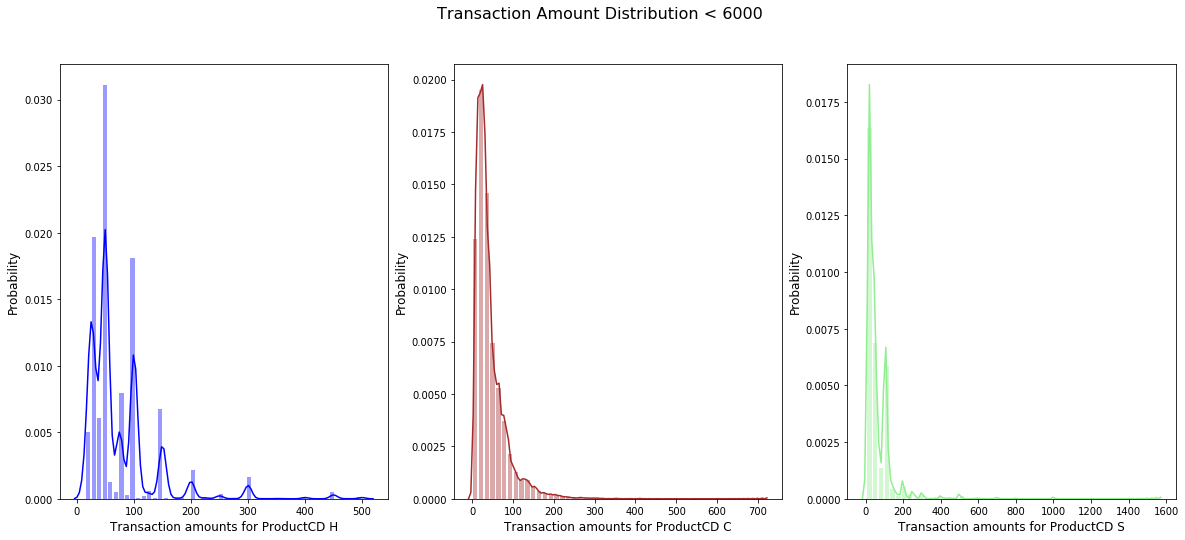

In [129]:
trial_t = tran_t.loc[:, ['ProductCD', 'TransactionAmt', 'isFraud']]
plt.figure(figsize=(20,8))
grid = plt.GridSpec(1, 3, hspace=0.1)
plt.suptitle('Transaction Amount Distribution < 6000', fontsize=16)
plt.subplot(grid[0, 0])
tranHistF = sb.distplot((trial_t[trial_t['ProductCD'] == "H"]['TransactionAmt']), color="b", hist_kws={"rwidth":0.75})
tranHistF.set_xlabel("Transaction amounts for ProductCD H", fontsize=12)
tranHistF.set_ylabel("Probability", fontsize=12)
plt.subplot(grid[0, 1])
tranHistNf = sb.distplot((trial_t[trial_t['ProductCD'] == "C"]['TransactionAmt']), color="brown", hist_kws={"rwidth":0.75})
tranHistNf.set_xlabel("Transaction amounts for ProductCD C", fontsize=12)
tranHistNf.set_ylabel("Probability", fontsize=12)
plt.subplot(grid[0, 2])
tranHistNf = sb.distplot((trial_t[trial_t['ProductCD'] == "S"]['TransactionAmt']), color="lightgreen", hist_kws={"rwidth":0.75})
tranHistNf.set_xlabel("Transaction amounts for ProductCD S", fontsize=12)
tranHistNf.set_ylabel("Probability", fontsize=12)

plt.show()

## Part 4 - Correlation Coefficient

Graphs below depict various parameters related to transaction amount vs the time of the day.

Straight forward Correlation between TransactionDT (as time of the day ) and Transaction Amount is **0.04579**.
However, the correlation between hour of the day and mean transaction amoutn/hour is **0.8006**.

Please find below the table consisting of various parameters related to Transaction Amount in accordance to the Transaction Hour of the day.

Hour| counts|means|maxTransaction|isFraud|isNotFraud
-------|----|---|---|----|---|
0	|39353	|126.922843	|31937.391  |1327	|38026
1	|35179	|119.615197	|5047.470	|1038	|34141
2	|30021	|113.285142	|3584.950	|1024	|28997
3	|23775	|109.054989	|4577.700	|872	|22903
4	|17765	|105.342589	|4577.700	|814	|16951
5	|12176	|103.711595	|3191.000	|749	|11427
6	|7718	|104.435287	|3190.000	|533	|7185
7	|4602	|111.402358	|3190.000	|447	|4155
8	|3048	|117.442146	|2789.000	|299	|2749
9	|2414	|141.347952	|3080.970	|244	|2170
10	|2871	|135.394691	|2681.000	|211	|2660
11	|4919	|127.703078	|3866.700	|187	|4732
12	|9253	|125.968465	|3618.310	|335	|8918
13	|16110	|135.992551	|4191.000	|403	|15707
14	|24641	|143.708923	|6085.230	|584	|24057
15	|31427	|150.425104	|5420.000	|813	|30614
16	|36470	|147.769702	|5543.230	|941	|35529
17	|39889	|148.417155	|6450.970	|1226	|38663
18	|41036	|149.965166	|5279.950	|1342	|39694
19	|42299	|144.762168	|4322.170	|1547	|40752
20	|41645	|145.086463	|5279.950	|1423	|40222
21	|41777	|142.791570	|5279.950	|1460	|40317
22	|41625	|139.060386	|5366.820	|1356	|40269


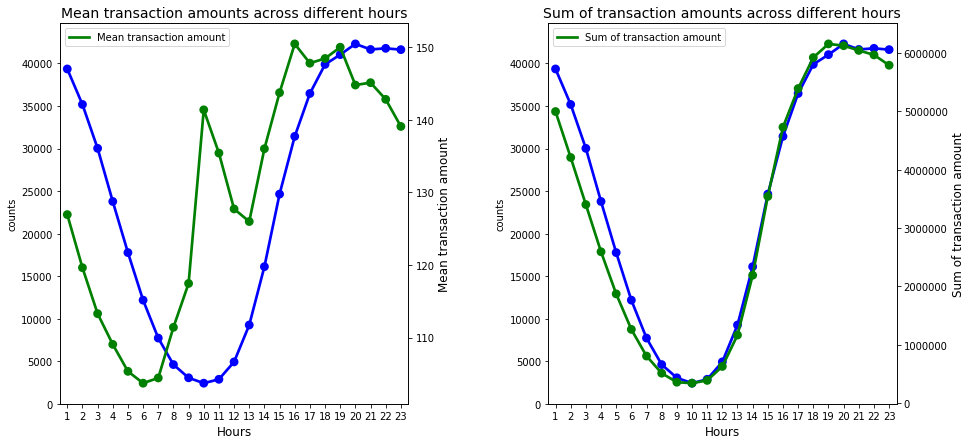

0.8006214039090453

In [31]:
# Preparing the data

trial_t = tran_t.loc[:, ['TransactionDT', 'TransactionAmt', 'isFraud']]
trial_t["Hour"] = trial_t['TransactionDT'].apply(lambda time: round(time/(3600))%24)
hours = []
counts = []
means = []
sumOfTransaction = []

for hour in np.arange(0,23,1):
    trial_t_by_hour = trial_t[trial_t['Hour'] == hour]
    hours.append(hour+1)
    counts.append(trial_t_by_hour['TransactionAmt'].count())
    means.append(trial_t_by_hour['TransactionAmt'].mean())
    maxTransaction.append(trial_t_by_hour['TransactionAmt'].max())
    std.append(trial_t_by_hour['TransactionAmt'].std())
    sumOfTransaction.append(trial_t_by_hour['TransactionAmt'].sum())

trial_t_by_hour = pd.DataFrame()
trial_t_by_hour['hours']  = hours
trial_t_by_hour['counts']  = counts
trial_t_by_hour['means']  = means
trial_t_by_hour['sumOfTransaction']  = sumOfTransaction

plt.figure(figsize=(15,7))
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
pairMap = {
    "means": ["counts", "means", "Mean transaction amounts across different hours", "Mean transaction amount", 0,0,"green"],
    "sum": ["counts", "sumOfTransaction", "Sum of transaction amounts across different hours", "Sum of transaction amount", 0,1,"green"],
}
for i in ["means", "sum"]:
    plt.subplot(grid[pairMap[i][4], pairMap[i][5]])
    countPlot_breakdown = sb.pointplot(y=pairMap[i][0], x="hours", data=trial_t_by_hour, color='blue')
    plt.title(pairMap[i][2], fontsize=14);
    countPlot_breakdown_1 = countPlot_breakdown.twinx()
    countPlot_breakdown_1 = sb.pointplot(y=pairMap[i][1], x="hours", data=trial_t_by_hour, color=pairMap[i][6])
    countPlot_breakdown_1.set_ylabel(pairMap[i][3], fontsize=12)
    countPlot_breakdown.set_xlabel("Hours", fontsize=12)
    countPlot_breakdown_1.legend([pairMap[i][3]], loc=0)

plt.show()

trial_t_by_hour['hours'].corr(trial_t_by_hour['means'])

In [160]:
trial_t = tran_t.loc[:, ['TransactionDT', 'TransactionAmt', 'isFraud']]
trial_t["Hour"] = trial_t['TransactionDT'].apply(lambda time: round(time/(3600))%24)
trial_t['Hour'].corr(trial_t['TransactionAmt'])

0.045791807569010516

## Part 5 - Interesting Plot

In the plot below we can see that the fraudulent transactions increase during the off time hours (mostly night).

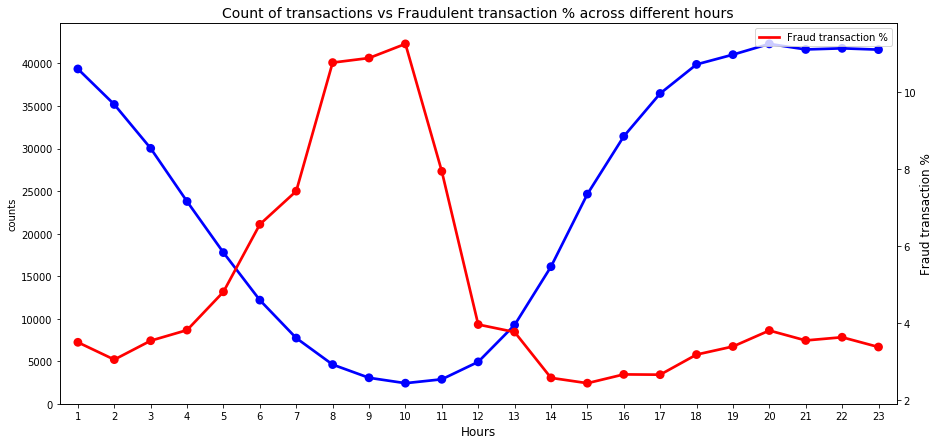

In [33]:
trial_t = tran_t.loc[:, ['TransactionDT', 'TransactionAmt', 'isFraud']]
trial_t["Hour"] = trial_t['TransactionDT'].apply(lambda time: round(time/(3600))%24)
hours = []
counts = []
isFraud = []

for hour in np.arange(0,23,1):
    trial_t_by_hour = trial_t[trial_t['Hour'] == hour]
    hours.append(hour+1)
    counts.append(trial_t_by_hour['TransactionAmt'].count())
    isFraudCount = (trial_t_by_hour[trial_t_by_hour['isFraud'] == 1])['TransactionAmt'].count()
    isNotFraudCount = (trial_t_by_hour[trial_t_by_hour['isFraud'] == 0])['TransactionAmt'].count()
    isFraud.append((isFraudCount/isNotFraudCount) * 100)

trial_t_by_hour = pd.DataFrame()
trial_t_by_hour['hours']  = hours
trial_t_by_hour['counts']  = counts
trial_t_by_hour['isFraud']  = isFraud

plt.figure(figsize=(15,7))

countPlot_breakdown = sb.pointplot(y='counts', x="hours", data=trial_t_by_hour, color='blue')
plt.title("Count of transactions vs Fraudulent transaction % across different hours", fontsize=14);
countPlot_breakdown_1 = countPlot_breakdown.twinx()
countPlot_breakdown_1 = sb.pointplot(y="isFraud", x="hours", data=trial_t_by_hour, color="red")
countPlot_breakdown_1.set_ylabel("Fraud transaction %", fontsize=12)
countPlot_breakdown.set_xlabel("Hours", fontsize=12)
countPlot_breakdown_1.legend(["Fraud transaction %"], loc=0)
plt.show()

Other observations in the data: For **productCD W** there is no correponding data in the identity table.

In [41]:
merged_t['ProductCD'].value_counts()

C    62192
R    37548
H    32908
S    11585
Name: ProductCD, dtype: int64

## Part 6 - Prediction Model

In [167]:
tran_train = tran_t
iden_train = iden_t
tran_test = pd.read_csv('/Users/rajatrhande/Desktop/DSF/Lab/ieee-fraud-detection/test_transaction.csv')
iden_test = pd.read_csv('/Users/rajatrhande/Desktop/DSF/Lab/ieee-fraud-detection/test_identity.csv')

merged_train = pd.merge(tran_train, iden_train, how="left", left_on="TransactionID", right_on="TransactionID")
merged_test = pd.merge(tran_test, iden_test, how="left", left_on="TransactionID", right_on="TransactionID")

# Columns are chosen based on maximum correlation.
columns = ['TransactionID','TransactionDT','TransactionAmt','ProductCD',
'card1','card2','card3','card4','card5','card6','addr1','addr2','dist1','dist2',
'P_emaildomain','R_emaildomain',
'M1','M2','M3','M4','M5','M6','M7','M8','M9',
'id_01','id_02','id_03','id_04','id_05','id_06','id_07','id_08','id_09','id_10','id_11','id_12','id_13','id_14',
'id_15','id_16','id_17','id_18','id_19','id_20','id_21','id_22','id_23','id_24','id_25','id_26','id_27',
'id_28','id_29','id_30','id_31','id_32','id_33','id_34','id_35','id_36','id_37','id_38',
'DeviceType','DeviceInfo']

model_merged_train = merged_train[columns]
model_merged_test = merged_test[columns]

In [ ]:
model_merged_train.fillna(0.0, inplace=True)

In [ ]:
model_merged_test.fillna(0.0, inplace=True)

In [ ]:
model_merged_train = model_merged_train.assign(TransactionDT=lambda model_merged_train: round(model_merged_train.TransactionDT/(3600 * 24)))
model_merged_test = model_merged_test.assign(TransactionDT=lambda model_merged_test: round(model_merged_test.TransactionDT/(3600 * 24)))

In [ ]:
labelEncoder = LabelEncoder()

columns = ['ProductCD','card4','card6','addr1','addr2',
'P_emaildomain','R_emaildomain',
'M1','M2','M3','M4','M5','M6','M7','M8','M9',
'id_12','id_15','id_16','id_23','id_27','id_28','id_29','id_30','id_31','id_33','id_34','id_35','id_36','id_37','id_38',
'DeviceType','DeviceInfo']

for col in columns:
    value = list(model_merged_train[col].values.astype(str)) + list(model_merged_test[col].values.astype(str))
    labelEncoder.fit(value)
    model_merged_train[col] = labelEncoder.transform(model_merged_train[col].astype(str))
    model_merged_test[col] = labelEncoder.transform(model_merged_test[col].astype(str))

In [ ]:
from sklearn.model_selection import train_test_split
train_q, test_q, train_a, test_a = train_test_split(model_merged_train, merged_train['isFraud'], test_size=0.3)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

reg = RandomForestRegressor(n_estimators=160)
reg.fit(train_q,train_a)

In [ ]:
regTest = reg.predict(test_q)
print(accuracy_score(test_a, regTest.round()))

In [ ]:
finalRegTest = reg.predict(model_merged_test)
submission = pd.DataFrame({'TransactionID':model_merged_test['TransactionID'], 'isFraud': finalRegTest[:]})
submission.to_csv('/Users/rajatrhande/Desktop/DSF/Lab/ieee-fraud-detection/submission.csv',index=False);

After looking up the basics of machine learning models, chose to use **Random Forest Classifier** provided by the scikit library.

Based on the correlation with isFraud, listed out the columns to be used for the model. The next challenge was to preprocess the data. Identified the columns with null values and filled them up with zeros.

To remove string (object) values from the columns, used label encoder that converts text data, or categorical data, into numbers, which our predictive models can better understand.

The next step of the process was to split the training data into train and test data. The purpose of this step is to keep aside some training data for testing once the model is ready. Used train_test_split function from scikit-learn library to perform this task.

I next fit the training data (parameters and result) into RandomForest Regressor model. Fiddled around n_estimator value, that fits a number of decision tree classifiers and controls over-fitting.

With this model predicted result for the remaining train data (test data) with an accuracy of **0.9823** (best case).

Following the same procedure predicted the result for the test data (provided by kaggle). On submitting the CSV on Kaggle, received an accuracy of **0.8502** (best case).

From not knowing much about the subject, to successfully train and build a classification model, it has been a wonderful learning experience.


## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/rajat994/competitions

Highest Rank: 5125/5951

Score: Top 87%

Number of entries: 3

Submission proof : 
https://drive.google.com/open?id=1Pua2KQhJnd_irUabLkEYTLglBVnJRMfV

https://drive.google.com/open?id=1ApIDxvMLXJuw3QmeHS1HZke_dlZPA7ZB


## References

https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
https://en.wikipedia.org/wiki/Random_forest
https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns
https://howtothink.readthedocs.io/en/latest/PvL_H.html
https://stackoverflow.com/questions/37857577/joining-points-in-multi-series-seaborn-pointplot
https://stackoverflow.com/questions/33423758/how-to-create-multiple-series-scatter-plot-with-connected-points-using-seaborn
https://seaborn.pydata.org/generated/seaborn.countplot.html
https://seaborn.pydata.org/generated/seaborn.lineplot.html
http://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=s
https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter
https://www.geeksforgeeks.org/python-pandas-dataframe-mean/
https://stackoverflow.com/questions/47784215/seaborn-heatmap-custom-tick-values
https://seaborn.pydata.org/tutorial/distributions.html
https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
https://stackoverflow.com/questions/40165458/seaborn-pointplot-category-ordering-issue?rq=1
https://stackoverflow.com/questions/34962104/pandas-how-can-i-use-the-apply-function-for-a-single-column
http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/
https://stackoverflow.com/questions/44954123/rotate-xtick-labels-in-seaborn-boxplot
https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/
https://stackoverflow.com/questions/13611065/efficient-way-to-apply-multiple-filters-to-pandas-dataframe-or-series
https://stackoverflow.com/questions/31789160/convert-select-columns-in-pandas-dataframe-to-numpy-array
https://seaborn.pydata.org/examples/index.html
https://stackoverflow.com/questions/47303337/python-log-transformation-on-variables-using-numpy